In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

cites = pd.read_csv("cites.csv")
fig_kwargs = {'figsize': (12, 6), 'fontsize': 16}

cites.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [3]:
# Filling missing values
mode_year = cites['Year'].mode()
cites['Year'] = cites['Year'].fillna(mode_year)

mode_class = cites['Class'].mode()
cites['Class'] = cites['Class'].fillna(mode_class)

mode_taxon = cites['Taxon'].mode()
cites['Taxon'] = cites['Taxon'].fillna(mode_taxon)

mode_order = cites['Order'].mode()
cites['Order'] = cites['Order'].fillna(mode_order)

mode_family = cites['Family'].mode()
cites['Family'] = cites['Family'].fillna(mode_family)

mode_genus = cites['Genus'].mode()
cites['Genus'] = cites['Genus'].fillna(mode_genus)

mode_importer = cites['Importer'].mode()
cites['Importer'] = cites['Importer'].fillna(mode_importer)

mode_exporter = cites['Exporter'].mode()
cites['Exporter'] = cites['Exporter'].fillna(mode_exporter)

mode_origin = cites['Origin'].mode()
cites['Origin'] = cites['Origin'].fillna(mode_origin)

median_importer_quality = cites['Importer reported quantity'].median()
cites['Importer reported quantity'] = cites['Importer reported quantity'].fillna(median_importer_quality)

median_exporter_quantity = cites['Exporter reported quantity'].median()
cites['Exporter reported quantity'] = cites['Exporter reported quantity'].fillna(median_exporter_quantity)

mode_purpose = cites['Purpose'].mode()
cites['Purpose'] = cites['Purpose'].fillna(mode_purpose)

mode_source = cites['Source'].mode()
cites['Source'] = cites['Source'].fillna(mode_source)

<AxesSubplot:title={'center':'Wildlife Trade by CITES Appendix'}>

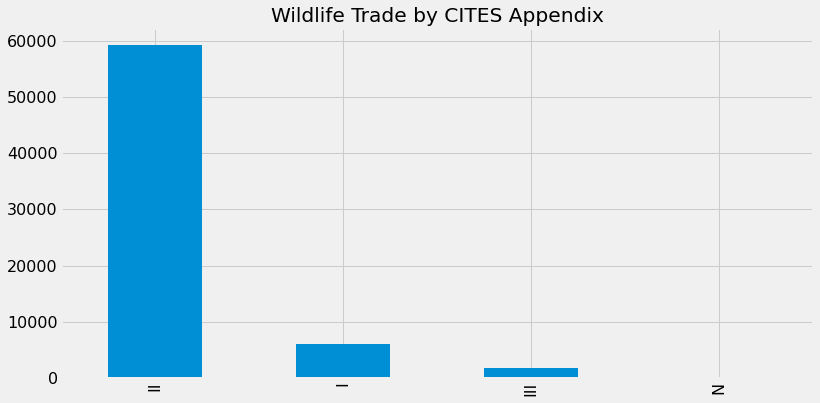

In [4]:
cites['App.'].value_counts().plot.bar(**fig_kwargs, title="Wildlife Trade by CITES Appendix")

<AxesSubplot:title={'center':'Wildlife Trade by CITES Appendix'}, ylabel='Frequency'>

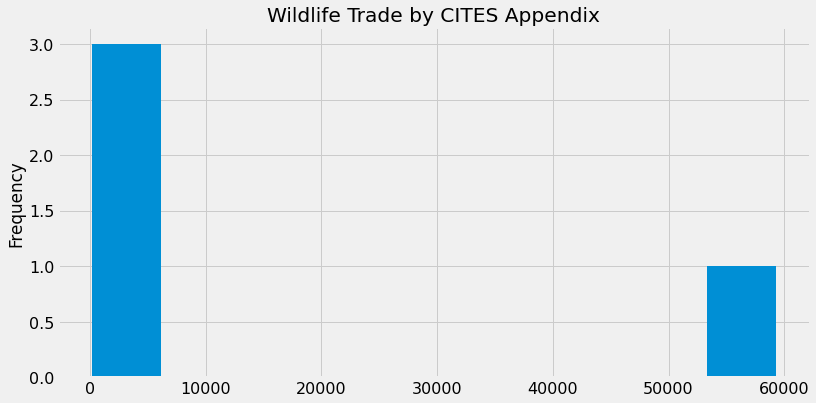

In [5]:
cites['App.'].value_counts().plot.hist(**fig_kwargs, title="Wildlife Trade by CITES Appendix", bins=10)

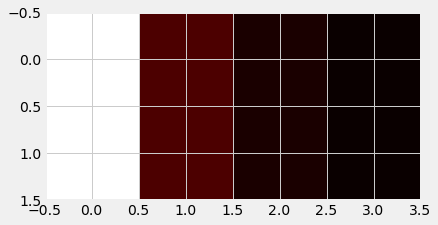

In [6]:
a = np.array([cites['App.'].value_counts().head(7), cites['App.'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:title={'center':'Wildlife Trade by Species Class'}>

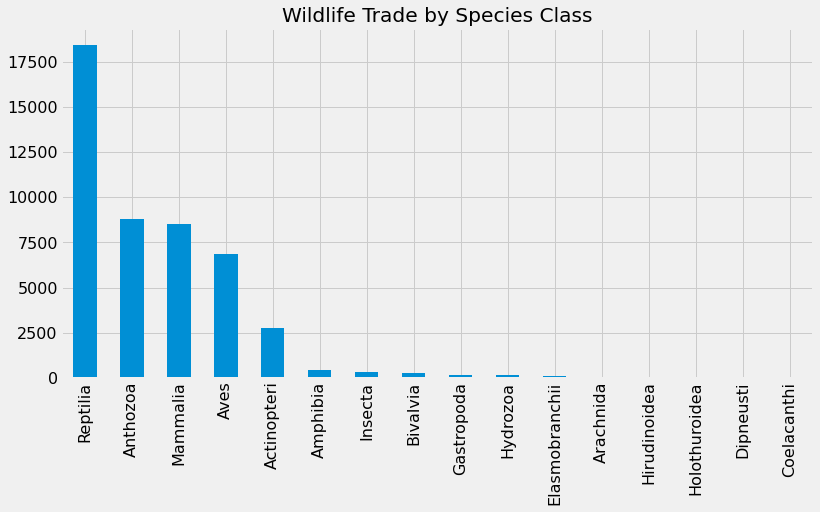

In [5]:
cites['Class'].value_counts().plot.bar(**fig_kwargs, title="Wildlife Trade by Species Class")

<AxesSubplot:title={'center':'Wildlife Trade by Species Class'}, ylabel='Frequency'>

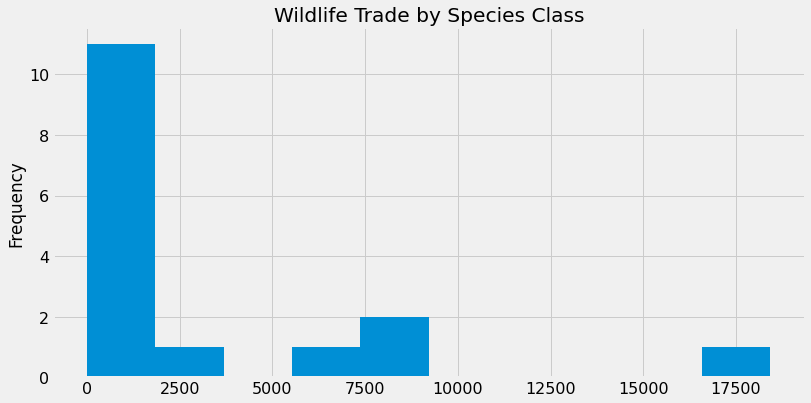

In [7]:
cites['Class'].value_counts().plot.hist(**fig_kwargs, title="Wildlife Trade by Species Class", bins = 10)

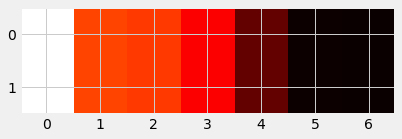

In [47]:
a = np.array([cites['Class'].value_counts().head(7), cites['Class'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

#correlation increasing as y axis value increases

<AxesSubplot:title={'center':'Top Wildlife Trade by Species Genus'}>

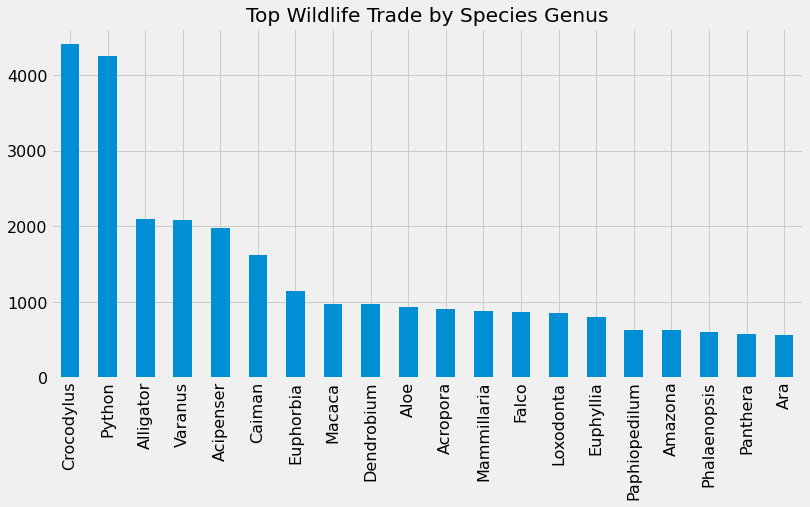

In [21]:
cites['Genus'].value_counts().head(20).plot.bar(
    **fig_kwargs, 
    title="Top Wildlife Trade by Species Genus"
)

<AxesSubplot:title={'center':'Top Wildlife Trade by Species Genus'}, ylabel='Frequency'>

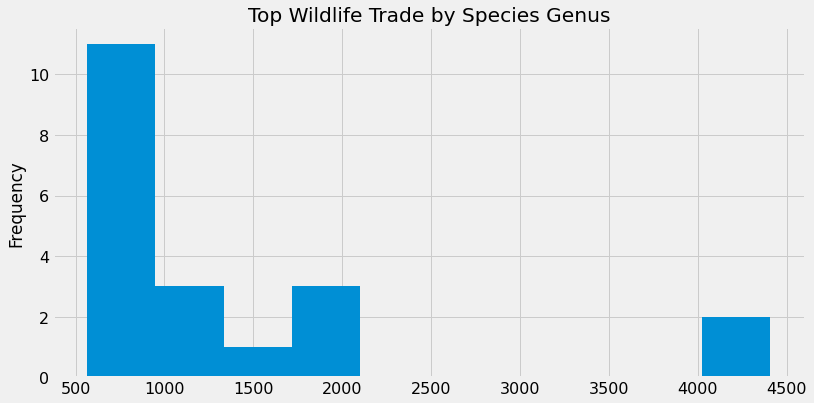

In [30]:
cites['Genus'].value_counts().head(20).plot.hist(
    **fig_kwargs, 
    title="Top Wildlife Trade by Species Genus"
)

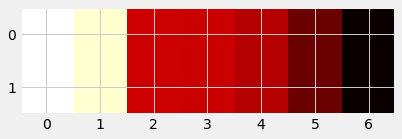

In [45]:
a = np.array([cites['Genus'].value_counts().head(7), cites['Genus'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:title={'center':'Top 10 Import/Export Countries'}>

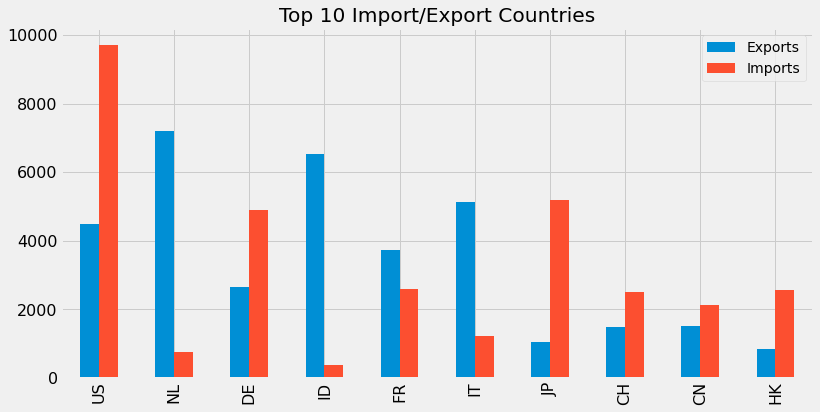

In [22]:
(pd.DataFrame()
     .assign(Exports=cites.Exporter.value_counts(), 
             Imports=cites.Importer.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(**fig_kwargs, title="Top 10 Import/Export Countries")
)

<AxesSubplot:title={'center':'Top 10 Import/Export Countries'}, ylabel='Frequency'>

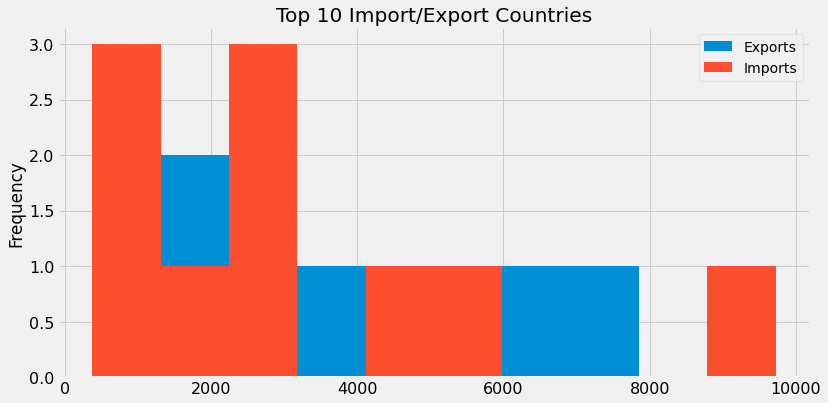

In [50]:
(pd.DataFrame()
     .assign(Exports=cites.Exporter.value_counts(), 
             Imports=cites.Importer.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.hist(**fig_kwargs, title="Top 10 Import/Export Countries", bins=10)
)

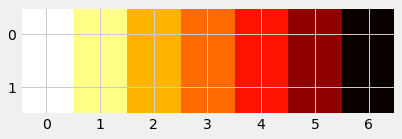

In [54]:
a = np.array([cites.Exporter.value_counts().head(7), cites.Exporter.value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:title={'center':'Top 10 Species Origins'}>

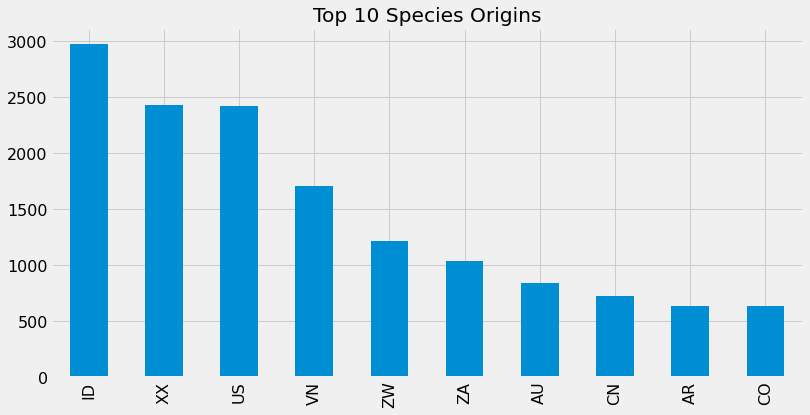

In [23]:
cites['Origin'].value_counts().head(10).plot.bar(**fig_kwargs, title="Top 10 Species Origins")

<AxesSubplot:title={'center':'Top 10 Species Origins'}, ylabel='Frequency'>

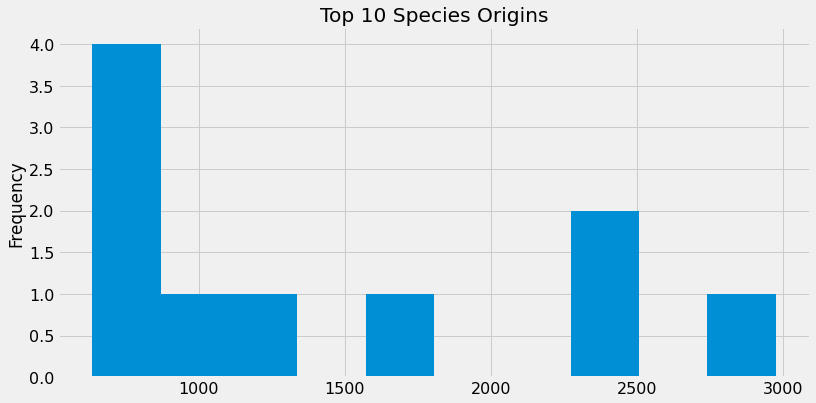

In [56]:
cites['Origin'].value_counts().head(10).plot.hist(**fig_kwargs, title="Top 10 Species Origins", bins=10)

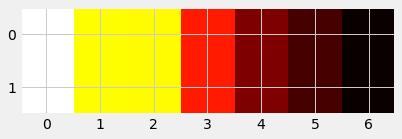

In [57]:
a = np.array([cites['Origin'].value_counts().head(7), cites['Origin'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [24]:
cites['Term'].value_counts().tail(10)

pupae            9
fingerlings      5
trunk            5
coral sand       4
eggshell         4
gall bladders    3
swim bladders    2
horn pieces      2
gall             1
fruit            1
Name: Term, dtype: int64

<AxesSubplot:title={'center':'Top 20 Products Traded'}>

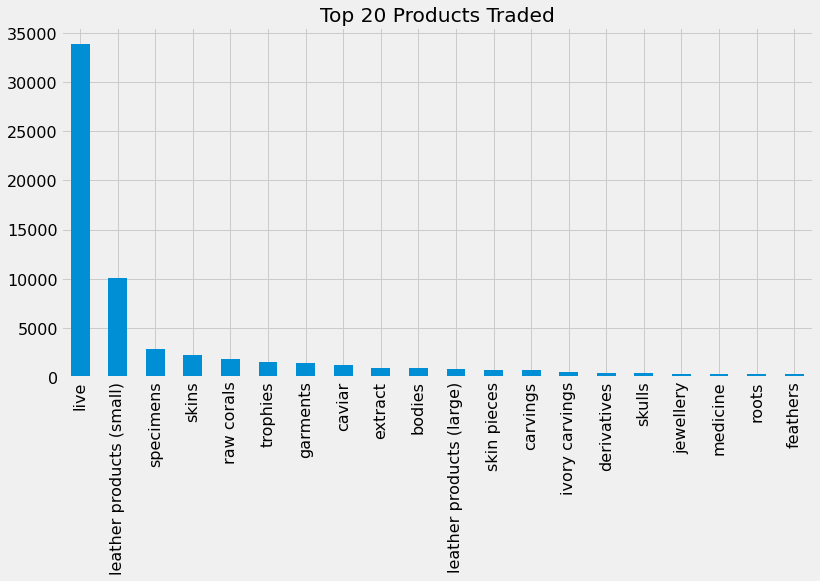

In [25]:
cites['Term'].value_counts().head(20).plot.bar(**fig_kwargs, title="Top 20 Products Traded")

<AxesSubplot:title={'center':'Top 20 Products Traded'}, ylabel='Frequency'>

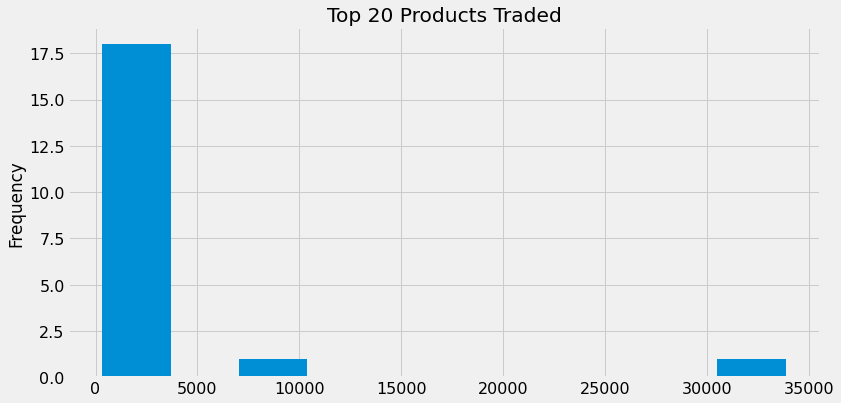

In [59]:
cites['Term'].value_counts().head(20).plot.hist(**fig_kwargs, title="Top 20 Products Traded", bins=10)

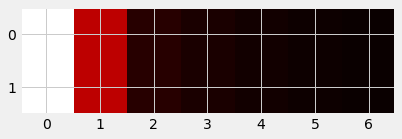

In [60]:
a = np.array([cites['Term'].value_counts().head(7), cites['Term'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:title={'center':'Import/Export Purposes'}>

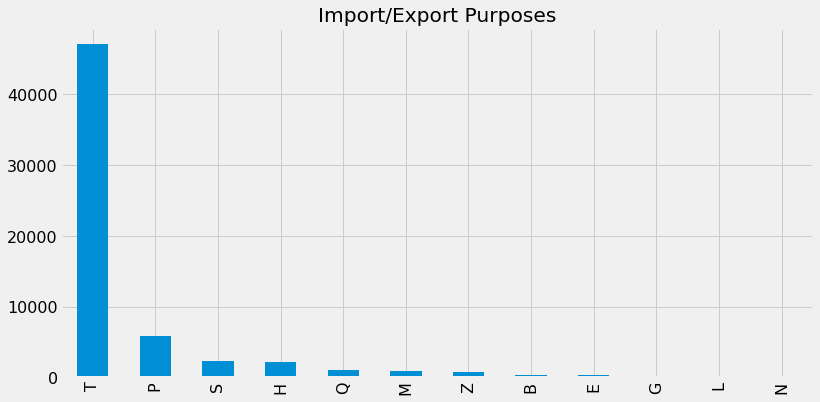

In [12]:
cites['Purpose'].value_counts().plot.bar(**fig_kwargs, title="Import/Export Purposes")

<AxesSubplot:title={'center':'Import/Export Purposes'}, ylabel='Frequency'>

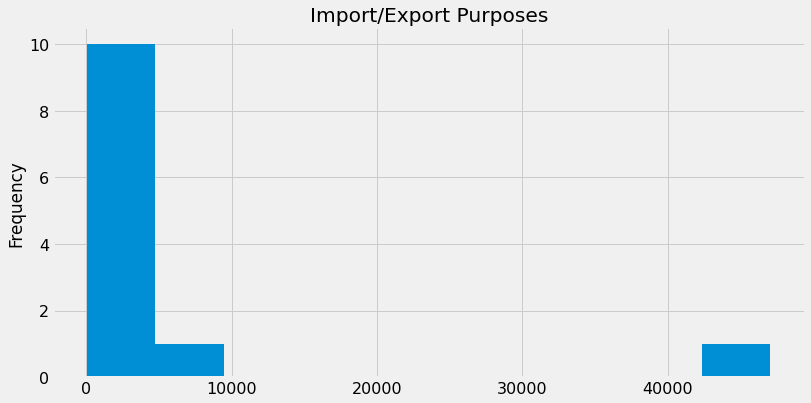

In [62]:
cites['Purpose'].value_counts().plot.hist(**fig_kwargs, title="Import/Export Purposes", bins=10)

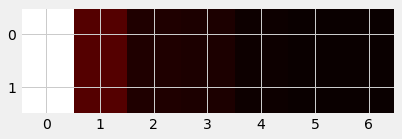

In [66]:
a = np.array([cites['Purpose'].value_counts().head(7), cites['Purpose'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:title={'center':'Import/Export Sources'}>

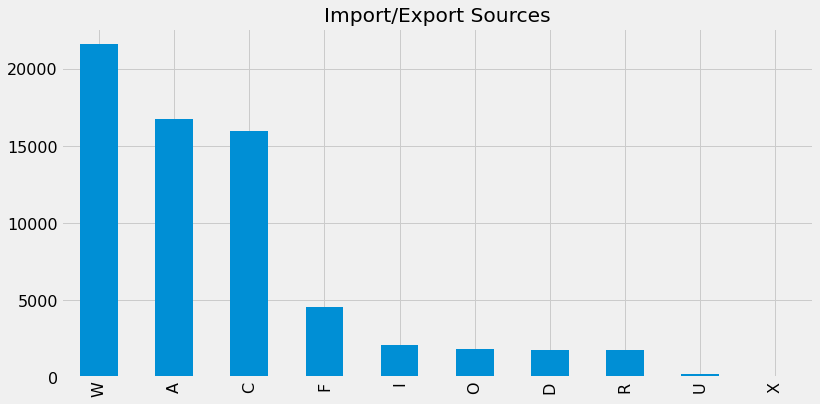

In [13]:
cites['Source'].value_counts().plot.bar(**fig_kwargs, title="Import/Export Sources")

<AxesSubplot:title={'center':'Import/Export Sources'}, ylabel='Frequency'>

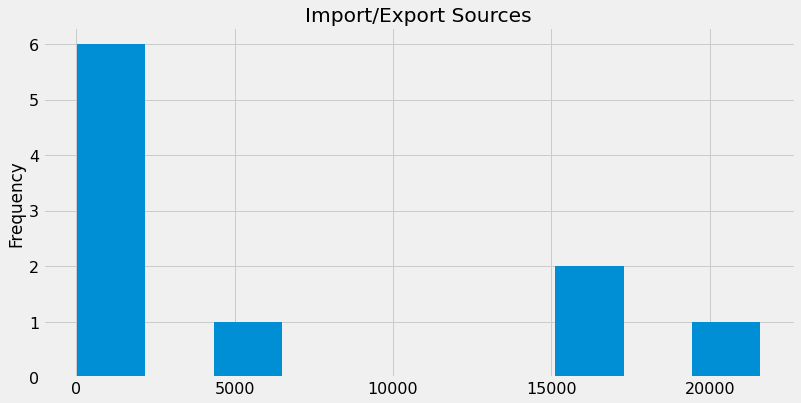

In [67]:
cites['Source'].value_counts().plot.hist(**fig_kwargs, title="Import/Export Sources", bins=10)

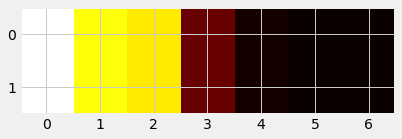

In [68]:
a = np.array([cites['Source'].value_counts().head(7), cites['Source'].value_counts().head(7)])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [21]:
l1 = cites['Genus'].value_counts()
l1 = l1[1:5]
print(l1)
print(len(l1))

Python       4248
Alligator    2100
Varanus      2079
Acipenser    1976
Name: Genus, dtype: int64
4


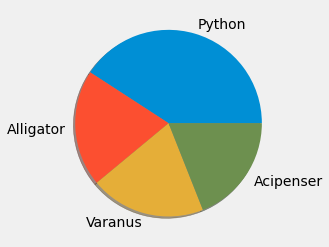

In [22]:
plt.pie(l1, explode=None, labels=['Python', 'Alligator', 'Varanus', 'Acipenser'], shadow = True)
plt.show()

In [23]:
l1 = cites['Class'].value_counts()
l1 = l1[1:5]
print(l1)
print(len(l1))

Anthozoa       8781
Mammalia       8505
Aves           6861
Actinopteri    2759
Name: Class, dtype: int64
4


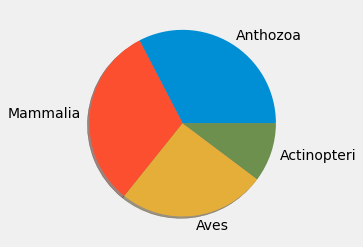

In [24]:
plt.pie(l1, explode=None, labels=['Anthozoa', 'Mammalia', 'Aves', 'Actinopteri'], shadow = True)
plt.show()

In [25]:
l1 = cites['Family'].value_counts()
l1 = l1[1:5]
print(l1)
print(len(l1))

Cactaceae        4800
Pythonidae       4488
Crocodylidae     4423
Alligatoridae    3758
Name: Family, dtype: int64
4


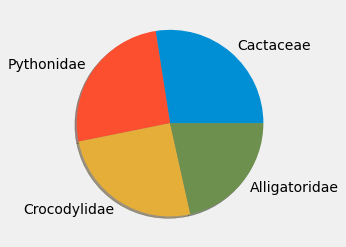

In [26]:
plt.pie(l1, explode=None, labels=['Cactaceae', 'Pythonidae', 'Crocodylidae', 'Alligatoridae'], shadow = True)
plt.show()

In [27]:
l1 = cites['Term'].value_counts()
l1 = l1[1:5]
print(l1)
print(len(l1))

leather products (small)    10106
specimens                    2852
skins                        2271
raw corals                   1903
Name: Term, dtype: int64
4


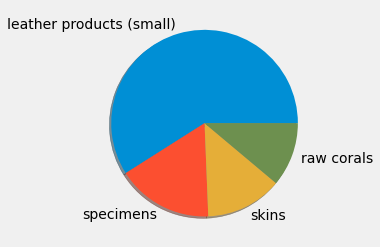

In [28]:
plt.pie(l1, explode=None, labels=['leather products (small)', 'specimens', 'skins', 'raw corals'], shadow = True)
plt.show()